In [1]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np
import glob
first_arr_loaded = True
for face_loc in ['known_faces/m1.png']:#glob.glob('known_faces/*png'):
    print(face_loc)
    image_ = face_recognition.load_image_file(face_loc)
    face_locations = face_recognition.face_locations(image_)
    face_encoding = face_recognition.face_encodings(image_ , model= 'small')[0]
    if first_arr_loaded:
        known_faces_arr = np.reshape(face_encoding, (-1,len(face_encoding)))
        first_arr_loaded = False
    else:
        known_faces_arr = np.append(known_faces_arr,  np.reshape(face_encoding, (-1,len(face_encoding))), axis = 0) 

known_faces/m1.png


In [2]:
first_arr_loaded = True
failed = []
faces = []

for face_loc in glob.glob('faces/*png'):
    try:
        image_ = face_recognition.load_image_file(face_loc)
        face_encoding = face_recognition.face_encodings(image_)[0]
        if first_arr_loaded:
            faces_arr = np.reshape(face_encoding, (-1,len(face_encoding)))
            first_arr_loaded = False
        else:
            faces_arr = np.append(faces_arr,  np.reshape(face_encoding, (-1,len(face_encoding))), axis = 0)
        faces.append(face_loc)
    except:
        failed.append(face_loc) 

In [3]:
similarity = face_recognition.face_distance(faces_arr,known_faces_arr)
similarity

array([0.65140393, 0.48717934, 0.58596944, 0.50507786, 0.61907149,
       0.66538422, 0.57001404, 0.63174908, 0.67163918, 0.67795179,
       0.63110928, 0.69859866, 0.6295133 , 0.6642025 , 0.67667981,
       0.61836041, 0.62978458, 0.64599158, 0.63685273, 0.6127959 ,
       0.62368121, 0.43479706, 0.61693748, 0.44939516, 0.44027096,
       0.67676439, 0.63451181, 0.61603264, 0.63368969, 0.64640119,
       0.69804511, 0.43185182, 0.67096829, 0.63959529, 0.61440959,
       0.46235043, 0.64372409, 0.67344481, 0.65788511, 0.62005848,
       0.43543539, 0.60983679, 0.63357597, 0.61967901, 0.48547395,
       0.65500208, 0.62339028, 0.64736636, 0.66381886, 0.61967508,
       0.62629244, 0.66358472, 0.73878498, 0.63986335])

In [4]:
import matplotlib.pyplot as plt

image_ = []
for i in np.array(faces)[similarity < 0.5]:
    image_.append(face_recognition.load_image_file(i))
len(image_)

8

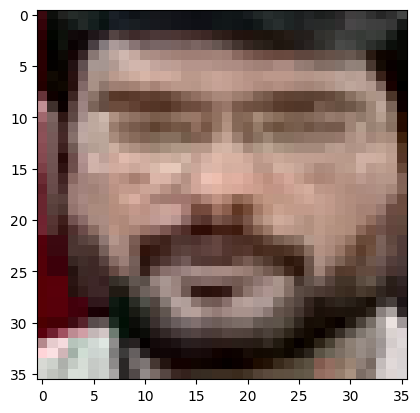

In [11]:
plt.imshow(image_[5])

In [27]:
from yt_dlp import YoutubeDL

URLS = ['https://www.youtube.com/watch?v=BaW_jenozKc']

import os

cur_dir = os.getcwd()
def download_video(link, id):
    youtube_dl_options = {
        "outtmpl": os.path.join('/Users/kowshik/projects/personal/alphapolitica/video_data', f"{id}.mp4"),
        'extract_audio': False,
        'format':'133'
    }
    with YoutubeDL(youtube_dl_options) as ydl:
        return ydl.download([link])


In [3]:
from __future__ import unicode_literals
from yt_dlp import YoutubeDL


ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'ids_data/1',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
    }],
}
with YoutubeDL(ydl_opts) as ydl:
    ydl.download(['http://www.youtube.com/watch?v=BaW_jenozKc'])

[youtube] Extracting URL: http://www.youtube.com/watch?v=BaW_jenozKc
[youtube] BaW_jenozKc: Downloading webpage
[youtube] BaW_jenozKc: Downloading android player API JSON
[info] BaW_jenozKc: Downloading 1 format(s): 251
[dashsegments] Total fragments: 1
[download] Destination: ids_data/1
[download] 100% of  138.96KiB in 00:00:00 at 1013.68KiB/s            
[ExtractAudio] Destination: ids_data/1.wav
Deleting original file ids_data/1 (pass -k to keep)


In [28]:
download_video('https://www.youtube.com/watch?v=NzSm94fUGbM','NzSm94fUGbM')

[youtube] Extracting URL: https://www.youtube.com/watch?v=NzSm94fUGbM
[youtube] NzSm94fUGbM: Downloading webpage
[youtube] NzSm94fUGbM: Downloading android player API JSON
[info] NzSm94fUGbM: Downloading 1 format(s): 133
[dashsegments] Total fragments: 1
[download] Destination: /Users/kowshik/projects/personal/alphapolitica/video_data/NzSm94fUGbM.mp4
[download] 100% of    6.51MiB in 00:00:01 at 4.73MiB/s               


0

In [54]:
id = 'sdfs'
os.path.join('/Users/kowshik/projects/personal/alphapolitica/video_data', f"{id}.mp4")

'/Users/kowshik/projects/personal/alphapolitica/video_data/sdfs.mp4'

In [29]:
import cv2
mp4_file_download = 'NzSm94fUGbM.mp4'
file = 'video_data/'+ mp4_file_download
cap = cv2.VideoCapture(file)
path = file.split('.mp4')[0]
os.mkdir(path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
save_interval = 5
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        frame_count += 1
        if frame_count % (fps * save_interval) == 1:
            cv2.imwrite(path + '/'+ str(frame_count) +'.png',frame)
    else:
        break
cap.release()
cv2.destroyAllWindows()
os.remove(file)

In [30]:
from src.create_faces_video import CreateFaces
import time
import glob
CF = CreateFaces()
CF.get_all_faces_from_folder()

NzSm94fUGbM


In [6]:
from yt_dlp import YoutubeDL

video = "http://www.youtube.com/watch?v=BaW_jenozKc"
youtube_dl_opts = {}
with YoutubeDL(youtube_dl_opts) as ydl:
      info_dict = ydl.extract_info(video, download=False)
      video_url = info_dict.get("url", None)
      video_id = info_dict.get("id", None)
      video_title = info_dict.get('title', None)
      views = info_dict.get('views', None)
      date = info_dict.get('publishdate', None)

[youtube] Extracting URL: http://www.youtube.com/watch?v=BaW_jenozKc
[youtube] BaW_jenozKc: Downloading webpage
[youtube] BaW_jenozKc: Downloading android player API JSON


In [9]:
video_title

'youtube-dl test video "\'/\\ä↭𝕐'

In [4]:
video_id

'BaW_jenozKc'

In [19]:
info_dict

{'id': 'BaW_jenozKc',
 'title': 'youtube-dl test video "\'/\\ä↭𝕐',
 'formats': [{'asr': 22050,
   'filesize': 59999,
   'format_id': '139',
   'format_note': 'low',
   'source_preference': -1,
   'fps': None,
   'audio_channels': 2,
   'height': None,
   'quality': 2.0,
   'has_drm': False,
   'tbr': 48.071,
   'url': 'https://rr3---sn-4g5ednde.googlevideo.com/videoplayback?expire=1682910516&ei=1NhOZKLgAsSPx_AP6NiRkA4&ip=2a02%3A908%3A1391%3A9560%3A9068%3Aacc0%3A1551%3Aada8&id=o-ALAVXmTteZBFvrfNyxLl8EyBTLYBY3rUI8ckhFROorK5&itag=139&source=youtube&requiressl=yes&mh=Rf&mm=31%2C26&mn=sn-4g5ednde%2Csn-5hneknek&ms=au%2Conr&mv=m&mvi=3&pl=47&initcwndbps=1433750&spc=qEK7B2vPGC7P38zXY0A414BK9SeEi1g&vprv=1&svpuc=1&mime=audio%2Fmp4&gir=yes&clen=59999&dur=9.984&lmt=1387961817987635&mt=1682888469&fvip=5&keepalive=yes&fexp=24007246&c=ANDROID&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Csvpuc%2Cmime%2Cgir%2Cclen%2Cdur%2Clmt&sig=AOq0QJ8wRAIgVbmTo1C5366rq8ZHHwNpoRmiQd6EuiSwL

In [11]:
info_dict['title']

'youtube-dl test video "\'/\\ä↭𝕐'

In [12]:
info_dict['description']

'test chars:  "\'/\\ä↭𝕐\ntest URL: https://github.com/rg3/youtube-dl/issues/1892\n\nThis is a test video for youtube-dl.\n\nFor more information, contact phihag@phihag.de .'

In [13]:
info_dict['categories']

['Science & Technology']

In [18]:
info_dict['view_count']

55629

In [15]:
info_dict['release_timestamp']

In [16]:
info_dict['comment_count']

84

In [17]:
info_dict['like_count']

477

In [ ]:
info_dict['like_count']